In [1]:
def compute_participating_nodes(max_nodes:int, cumul_bw: int, stripe_count: int, disk_bw: int):
    
    return max_nodes * (cumul_bw / (stripe_count * disk_bw))


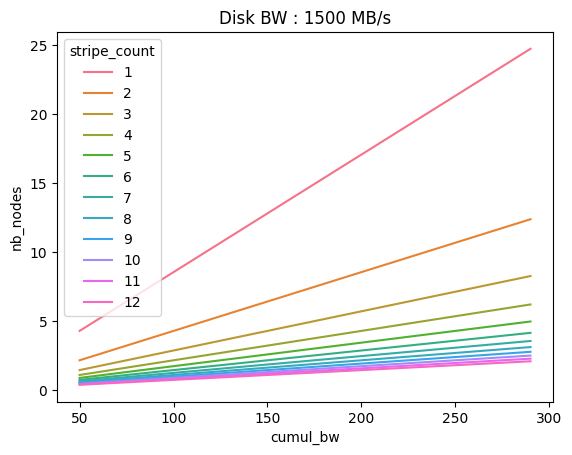

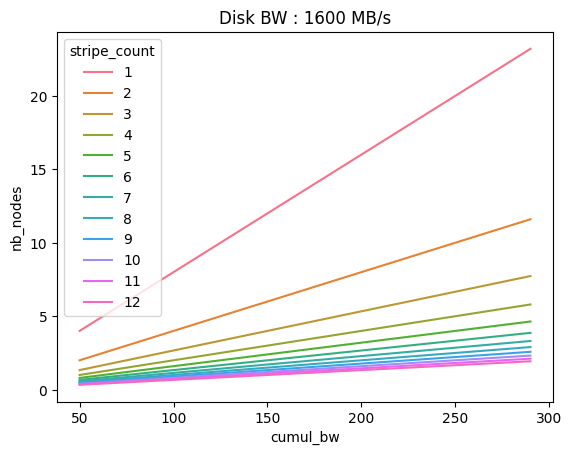

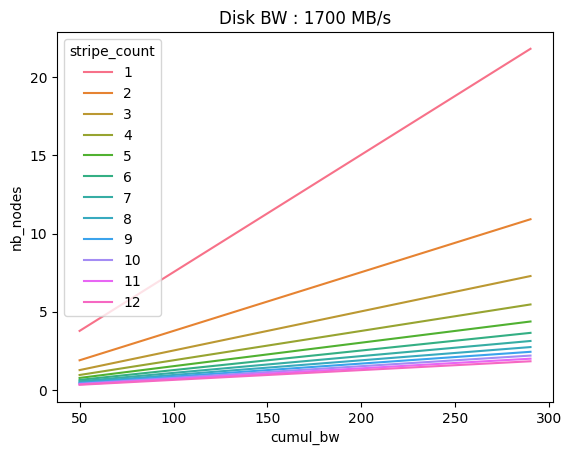

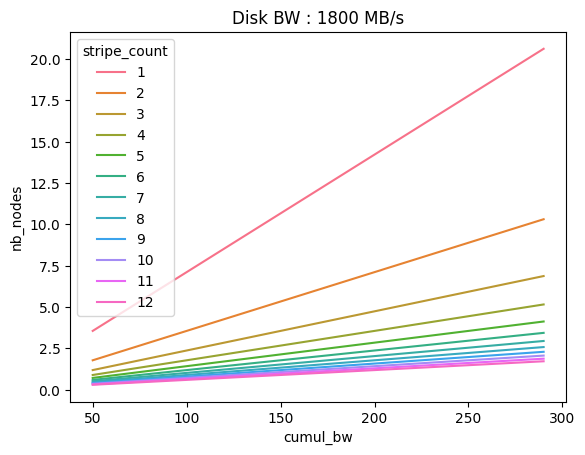

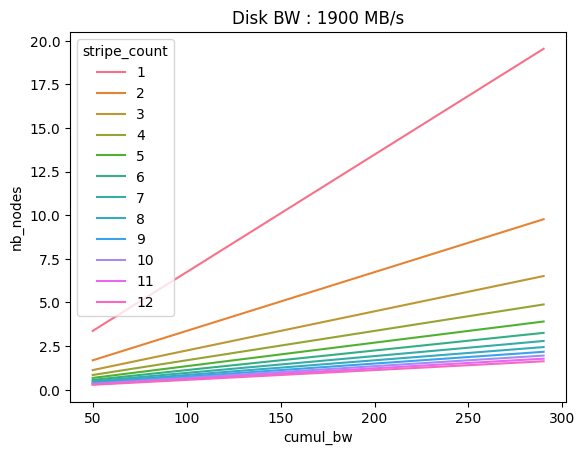

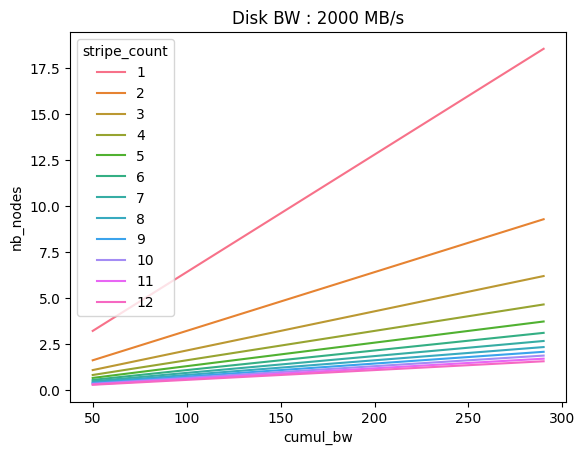

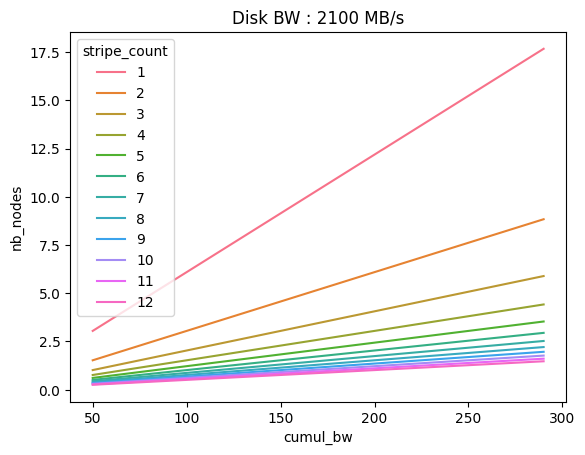

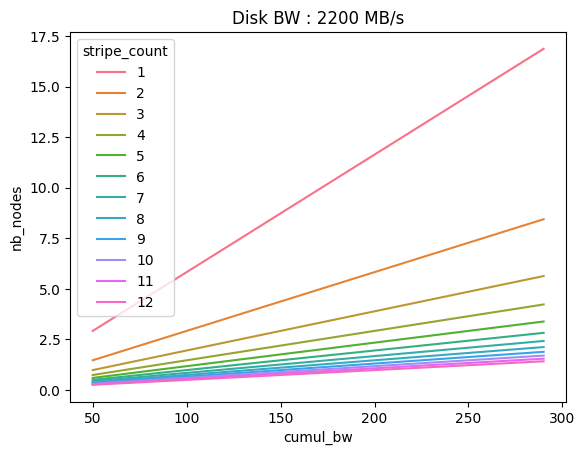

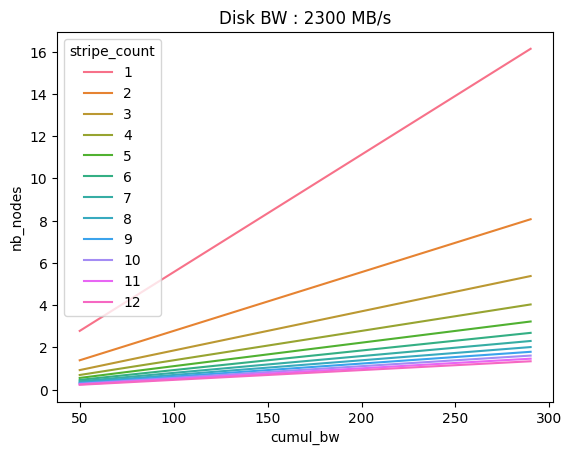

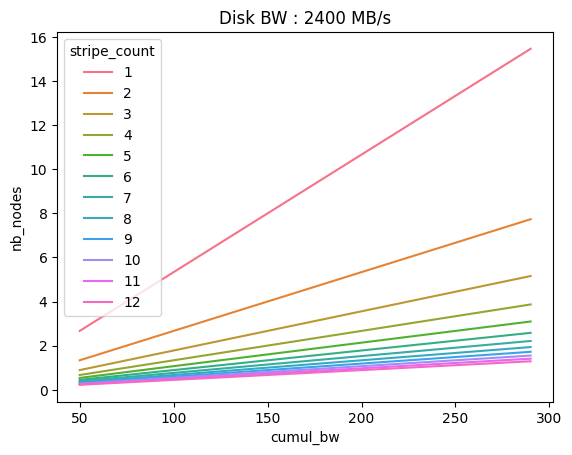

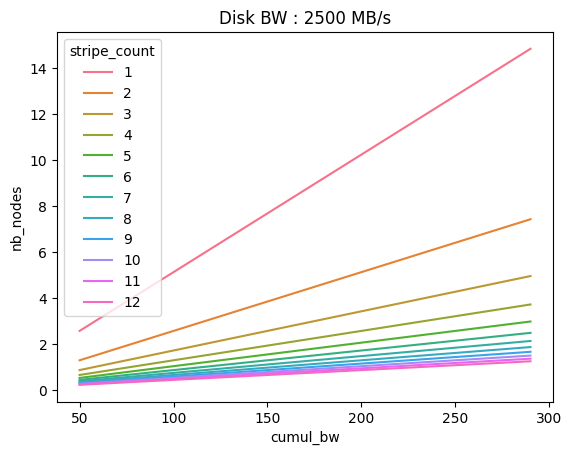

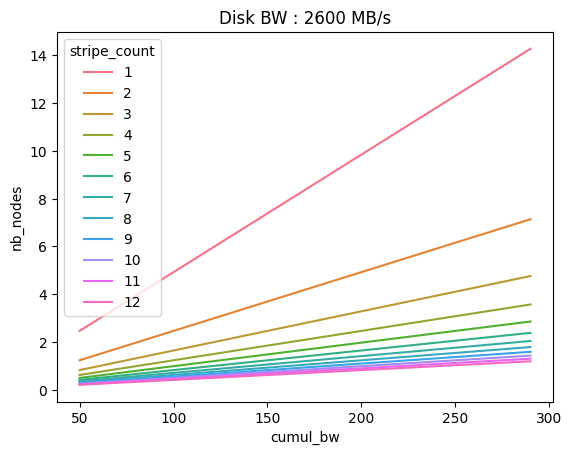

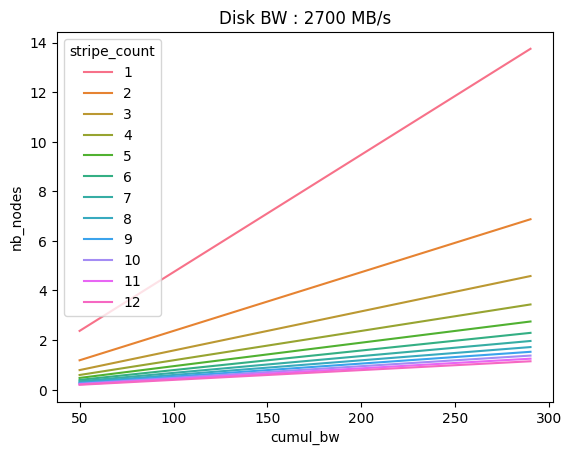

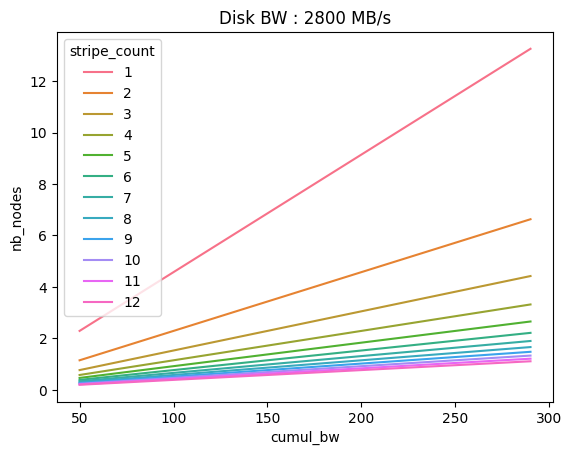

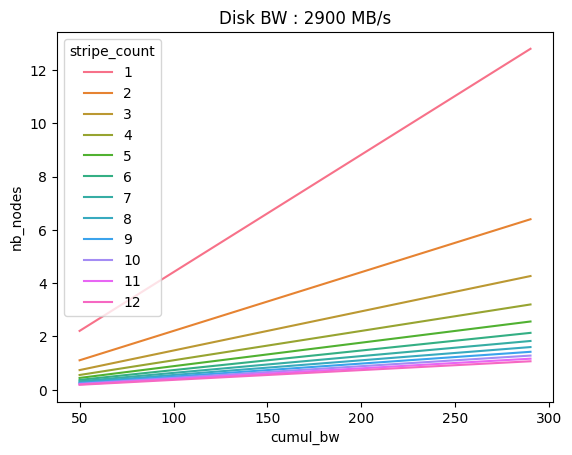

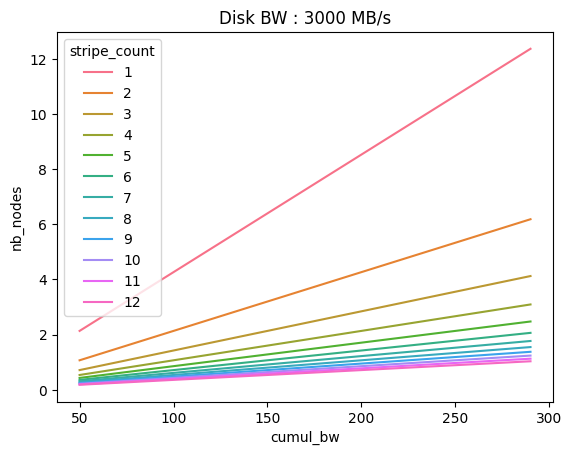

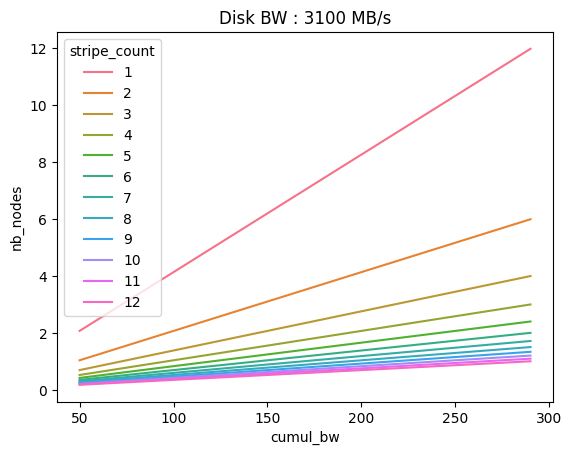

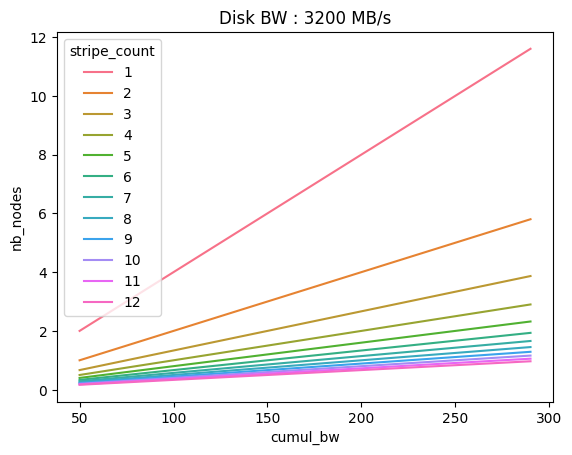

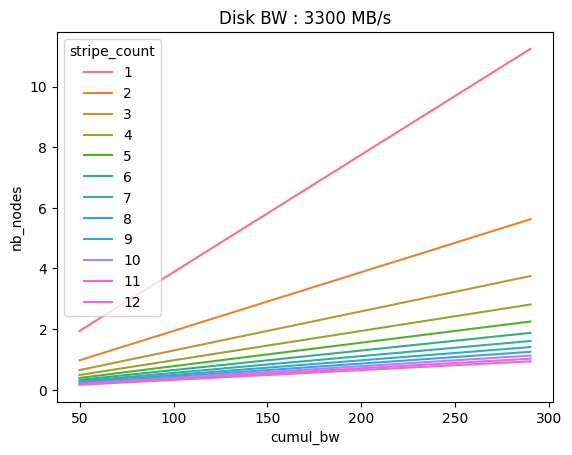

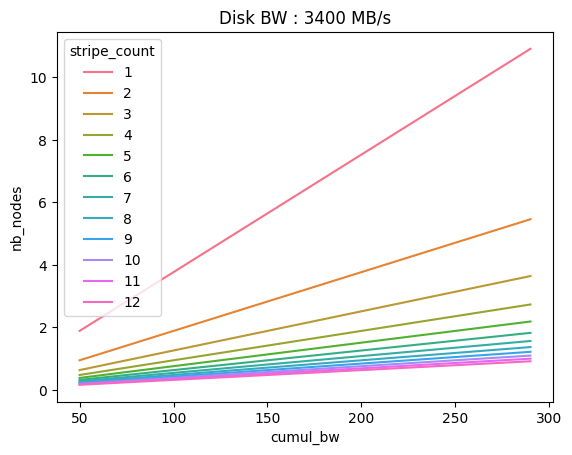

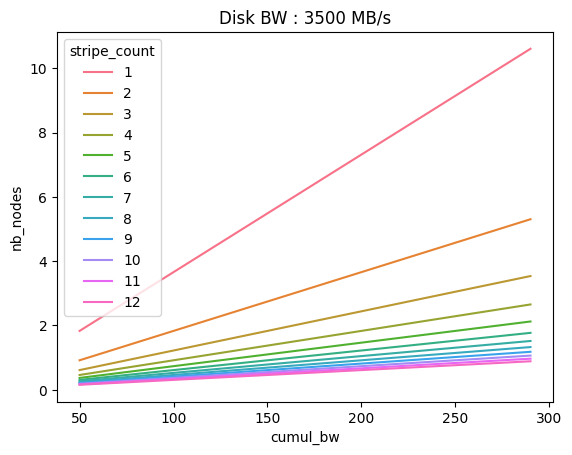

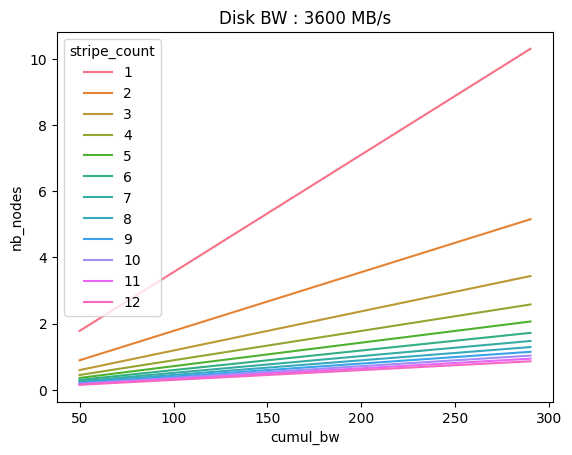

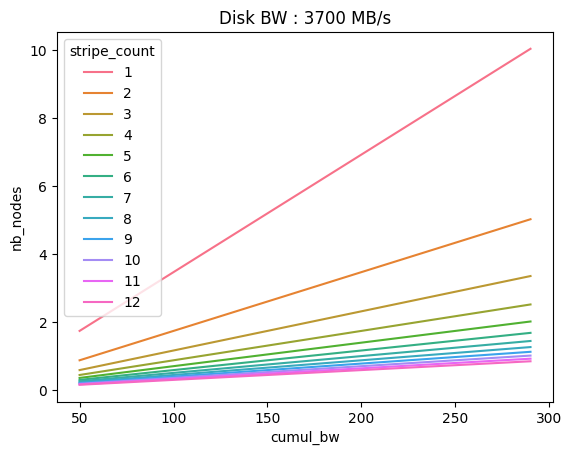

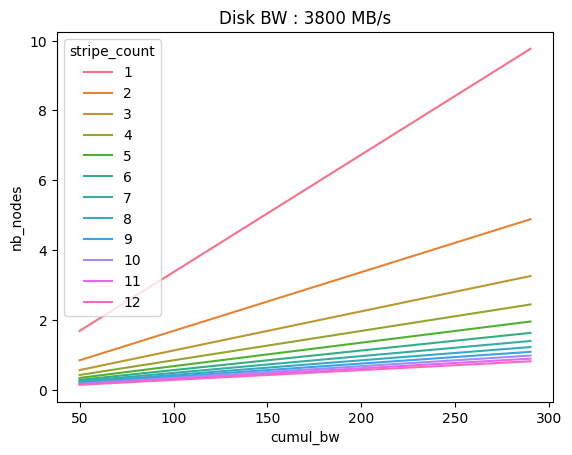

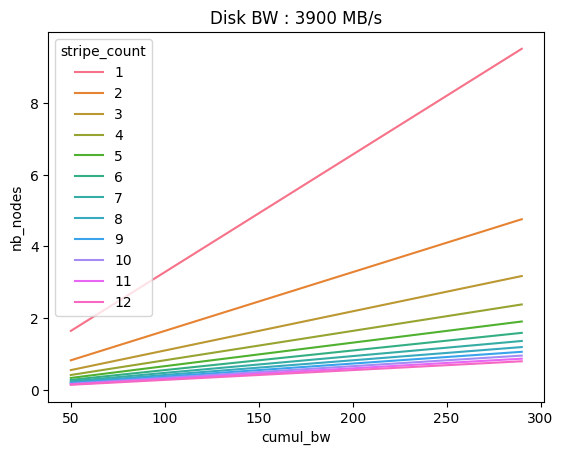

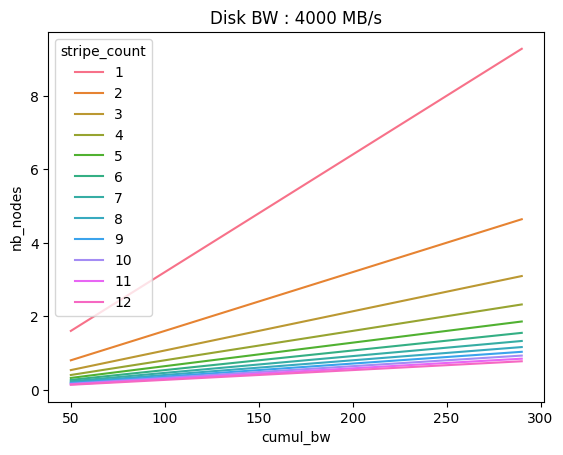

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


stripe_count = [str(i) for i in range(1, 13)]       # Stripe count, from 1 to 12
disk_bw = [i for i in range(1500, 4100, 100)]  # Disk BW from 1500MB/s to 4000MB/s
cumul_bw = [i for i in range(50, 300, 10)]     # Cumul BW of job, from 50MB/s to 300MB/s
max_nodes = 128

for d_bw in disk_bw:

    data = {"cumul_bw": [], "nb_nodes": [], "stripe_count": []}
    for sc in stripe_count:

        y_values = []
        for c_bw in cumul_bw:
            data["nb_nodes"].append(compute_participating_nodes(max_nodes, c_bw, int(sc), d_bw))
            data["cumul_bw"].append(c_bw)
            data["stripe_count"].append(sc)
    
    data = pd.DataFrame(data)    

    g = sns.lineplot(data=data, x="cumul_bw", y="nb_nodes", hue="stripe_count")
    g.set_title(f"Disk BW : {d_bw} MB/s")
    plt.show()
    